In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Importação da imagem

In [2]:
IMAGE_PATH = '../images/lenna.png'

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

### Funções uteis

In [3]:
def add_noise(image, probability=0.05):
    noisy_image = np.copy(image)
    # Adiciona ruído "salt"
    salt_mask = np.random.rand(*image.shape) < probability
    noisy_image[salt_mask] = 255

    # Adiciona ruído "pepper"
    pepper_mask = np.random.rand(*image.shape) < probability
    noisy_image[pepper_mask] = 0

    return noisy_image

def sobel_filter(image, ksize=3):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return sobel

### Questão 1 - Remoção de ruído

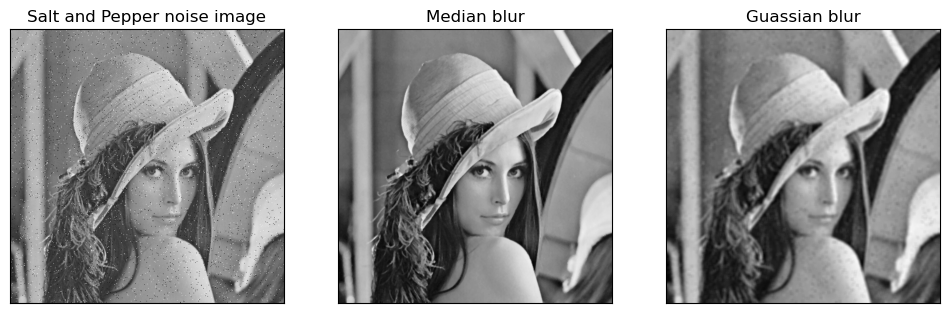

In [4]:
# Add noise
noisy_image = add_noise(image, 0.01)

# Apply median and gaussian blur
kernel_size = 3
median_image = cv2.medianBlur(noisy_image, kernel_size)

kernel_size = 7
guaussian_image = cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), 3)

# Configs for plot
titles = ['Salt and Pepper noise image', 'Median blur', 'Guassian blur']
images = [noisy_image, median_image, guaussian_image]

# Plot
fig = plt.figure(figsize=(12, 8))

for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Questão 2 - Detecção de borda

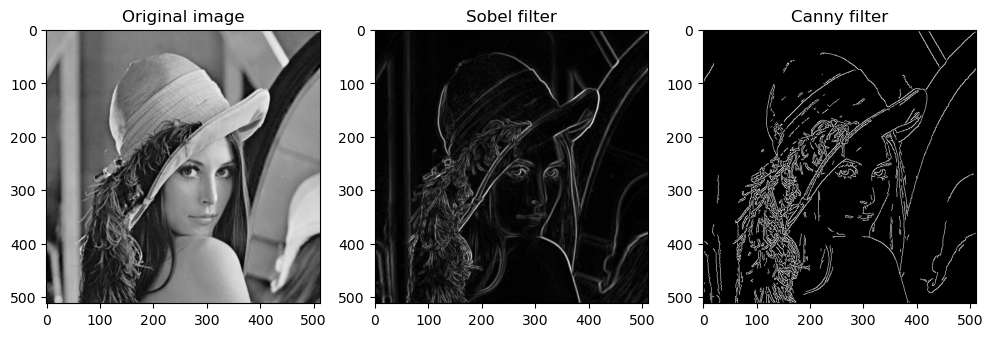

In [5]:
# Sobel filter
sobel_image = sobel_filter(image, ksize=5)
canny_image = cv2.Canny(image, 100, 150)

fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel filter')


plt.subplot(1, 3, 3)
plt.imshow(canny_image, cmap='gray')
plt.title('Canny filter')

plt.show()